# 45

In [1]:
# Тема завдання: Розрахунок індексів зміни заробітних плат з різними базовими періодами.

# Імпорт бібліотек
import pandas as pd

# Дані з таблиці (ручний ввід, оскільки файл не надано)
data = {
    'MONTH': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'EARNINGS': [
        10.58, 10.67, 10.48, 10.59, 10.67, 10.74, 10.74, 10.80,
        10.84, 10.87, 10.81, 10.93, 10.94, 10.96, 11.05, 10.83,
        11.05, 11.02, 11.06, 11.11, 11.15, 11.19, 11.22, 11.17
    ]
}

# Створення DataFrame
df = pd.DataFrame(data)

# (a) Індекс з базою в місяці 1
base_earnings_1 = df.loc[df['MONTH'] == 1, 'EARNINGS'].values[0]  # Базове значення = 10.58
df['INDEX (Base 1)'] = (df['EARNINGS'] / base_earnings_1 * 100).round(2)  # Формула індексу

# (b) Індекс з базою в місяці 15
base_earnings_15 = df.loc[df['MONTH'] == 15, 'EARNINGS'].values[0]  # Базове значення = 11.05
df['INDEX (Base 15)'] = (df['EARNINGS'] / base_earnings_15 * 100).round(2)  # Формула індексу

# Відображення результату у форматі таблиці з коментарями
print("Результати розрахунків:")
print(df[['MONTH', 'EARNINGS', 'INDEX (Base 1)', 'INDEX (Base 15)']].to_string(index=False))

Результати розрахунків:
 MONTH  EARNINGS  INDEX (Base 1)  INDEX (Base 15)
     1     10.58          100.00            95.75
     2     10.67          100.85            96.56
     3     10.48           99.05            94.84
     4     10.59          100.09            95.84
     5     10.67          100.85            96.56
     6     10.74          101.51            97.19
     7     10.74          101.51            97.19
     8     10.80          102.08            97.74
     9     10.84          102.46            98.10
    10     10.87          102.74            98.37
    11     10.81          102.17            97.83
    12     10.93          103.31            98.91
    13     10.94          103.40            99.00
    14     10.96          103.59            99.19
    15     11.05          104.44           100.00
    16     10.83          102.36            98.01
    17     11.05          104.44           100.00
    18     11.02          104.16            99.73
    19     11.06          

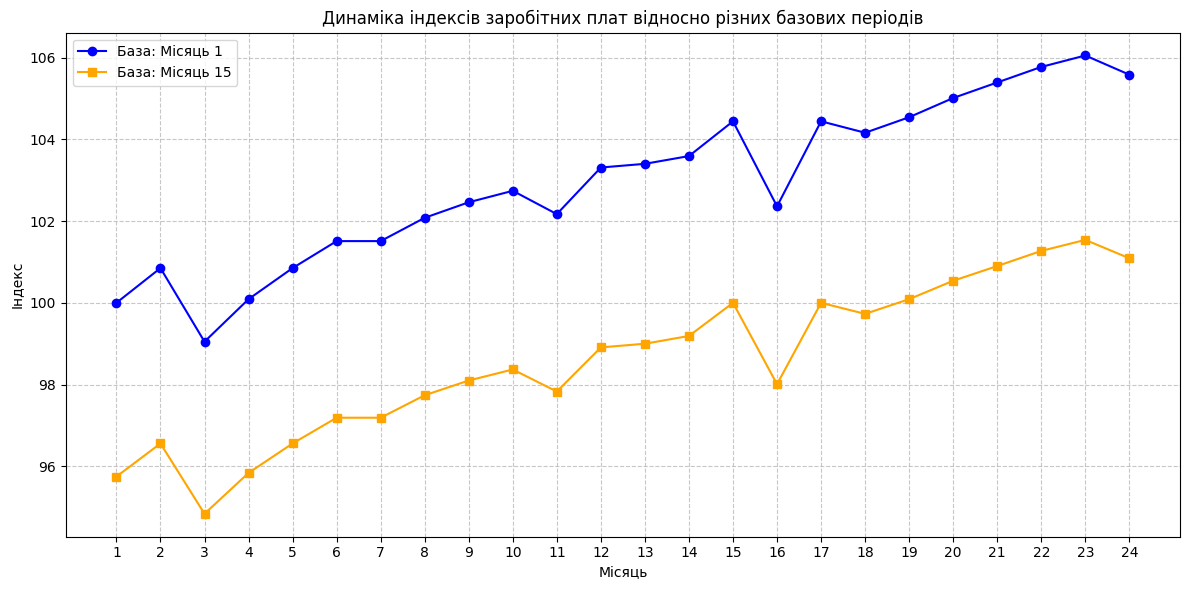

In [2]:
import matplotlib.pyplot as plt 
# Побудова графіка
plt.figure(figsize=(12, 6))  # Розмір області графіка
plt.plot(df['MONTH'], df['INDEX (Base 1)'], marker='o', label='База: Місяць 1', color='blue')
plt.plot(df['MONTH'], df['INDEX (Base 15)'], marker='s', label='База: Місяць 15', color='orange')

# Налаштування вигляду
plt.title('Динаміка індексів заробітних плат відносно різних базових періодів')
plt.xlabel('Місяць')
plt.ylabel('Індекс')
plt.xticks(df['MONTH'])  # Показати всі місяці на осі X
plt.grid(True, linestyle='--', alpha=0.7)  # Сітка
plt.legend()  # Легенда
plt.tight_layout()  # Автоматичне форматування

# Відображення графіка
plt.show()

# 46

Unweighted Aggregate Index of Prices:
0    100.000000
1    110.138590
2    116.908508
3    126.407074
4    142.090092
5    155.787897
dtype: float64

Laspeyres Price Index:
0    100.000000
1    109.722628
2    115.550573
3    123.472754
4    137.179848
5    149.408440
dtype: float64

Laspeyres Quantity Index:
0    100.000000
1    103.782586
2    100.040907
3    105.289246
4    106.001668
5    105.852384
dtype: float64


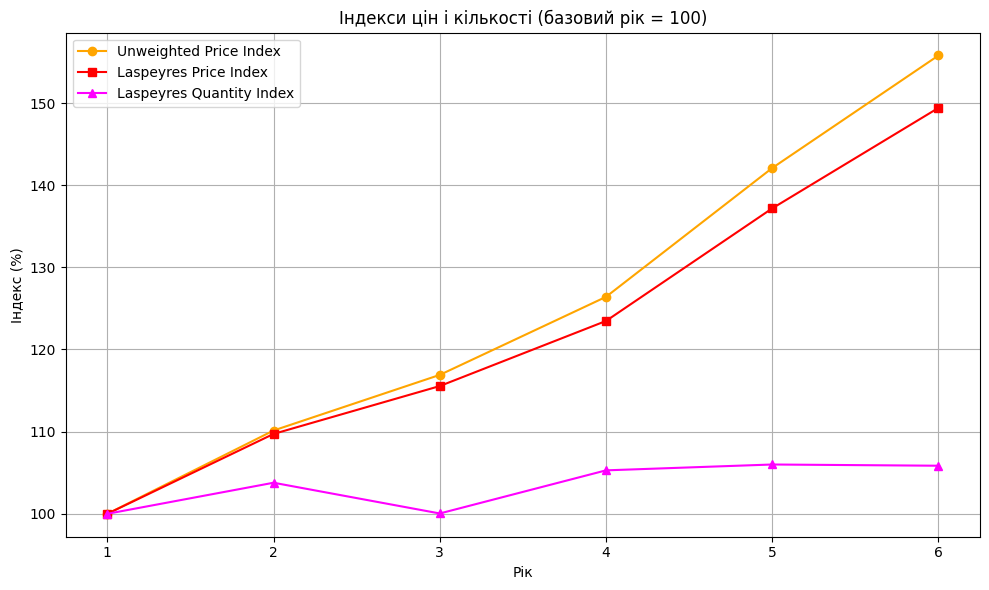

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Year": [1, 2, 3, 4, 5, 6],
    "Book Price": [20.4, 22.3, 23.3, 24.6, 27.0, 29.2],
    "Book Quantity": [694, 723, 687, 731, 742, 748],
    "Journal Price": [30.1, 33.4, 36.0, 39.8, 45.7, 50.7],
    "Journal Quantity": [155, 159, 160, 163, 160, 155]
}

df = pd.DataFrame(data)

base_year = 0

# (a) Неваговий агрегатний індекс цін
def unweighted_pi(df):
    book_index = df["Book Price"] / df.loc[base_year, "Book Price"]
    journal_index = df["Journal Price"] / df.loc[base_year, "Journal Price"]
    return ((book_index + journal_index) / 2) * 100


# (b) Індекс цін Ласпейреса
def laspeyres_pi(df):
    base_book_q = df.loc[base_year, "Book Quantity"]
    base_journal_q = df.loc[base_year, "Journal Quantity"]
    base_total = df.loc[base_year, "Book Price"] * base_book_q + df.loc[base_year, "Journal Price"] * base_journal_q
    current_total = df["Book Price"] * base_book_q + df["Journal Price"] * base_journal_q
    return (current_total / base_total) * 100

# (c) Індекс кількості Ласпейреса
def laspeyres_qi(df):
    base_book_p = df.loc[base_year, "Book Price"]
    base_journal_p = df.loc[base_year, "Journal Price"]
    base_total = base_book_p * df.loc[base_year, "Book Quantity"] + base_journal_p * df.loc[base_year, "Journal Quantity"]
    current_total = base_book_p * df["Book Quantity"] + base_journal_p * df["Journal Quantity"]
    return (current_total / base_total) * 100

# Обчислення
unweighted_index = unweighted_pi(df)
laspeyres_price = laspeyres_pi(df)
laspeyres_quantity = laspeyres_qi(df)

# Вивід результатів
print("Unweighted Aggregate Index of Prices:")
print(unweighted_index)

print("\nLaspeyres Price Index:")
print(laspeyres_price)

print("\nLaspeyres Quantity Index:")
print(laspeyres_quantity)


# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], unweighted_index, label="Unweighted Price Index", marker='o', color='orange')
plt.plot(df["Year"], laspeyres_price, label="Laspeyres Price Index", marker='s', color='red')
plt.plot(df["Year"], laspeyres_quantity, label="Laspeyres Quantity Index", marker='^', color='magenta')

plt.title("Індекси цін і кількості (базовий рік = 100)")
plt.xlabel("Рік")
plt.ylabel("Індекс (%)")
plt.grid(True)
plt.legend()
plt.xticks(df["Year"])
plt.tight_layout()
plt.show()

# 47

Часовий ряд можна розкласти на кілька компонентів, які разом пояснюють його поведінку в часі. До цих компонентів належать:

1. Тренд: Довгострокова тенденція (зростання, спад або стагнація), яку спостерігають протягом років або десятиліть.

2. Сезонність: Періодичні повторювані зміни, прив’язані до певних періодів (наприклад, щоденні, щомісячні або квартальні коливання).

3. Циклічність: Коливання, що виникають через нерегулярні інтервали, часто пов’язані з економічними або бізнесовими циклами (наприклад, економічні підйоми та рецесії).

4. Нерегулярні (залишкові) коливання: Випадкові, непередбачувані відхилення, які не пояснюються іншими компонентами.

Приклади бізнесових та економічних часових рядів із домінуючими компонентами:

Бізнесовий контекст:

* Роздрібні продажі:

__Сезонність: Різкі зростання продажів під час свят (наприклад, Різдво, Чорна п’ятниця).__

Приклад: Магазин одягу фіксує підвищення продажів щогрудня.

* Щомісячний дохід IT-компанії:

__Тренд: Стабільне зростання через збільшення кількості клієнтів.__

Приклад: Доход від підписок SaaS-компанії зростає щороку.

* Бронювання туристичних послуг:

__Циклічність: Попит змінюється залежно від економічної ситуації (наприклад, падіння під час рецесій).__

Економічний контекст:

* Валовий внутрішній продукт (ВВП):

__Тренд: Довгострокове економічне зростання.__

__Циклічність: Рецесії та відновлення формують відхилення від тренду.__

* Рівень безробіття:

__Циклічність: Зростає під час економічних криз і знижується в періоди підйому.__

* Сільськогосподарське виробництво:

__Сезонність: Періоди збору врожаю призводять до щорічних злетів (наприклад, врожай пшениці).__

* Споживання електроенергії:

__Сезонність: Підвищене використання влітку (кондиціонери) та взимку (опалення).__

Аналіз цих компонентів дозволяє ефективніше прогнозувати, виявляти аномалії та розуміти основні закономірності в даних.

# 48

При прогнозуванні часових рядів у бізнес-контексті задіюються такі ключові особливості їх поведінки:

1. Тенденція: Довгостроковий рух даних уверх або вниз, що відображає сталий ріст або спад (наприклад, зростання продажів через розширення ринку).

2. Сезонність: Періодичні повторювані шаблони, прив’язані до певних часових інтервалів (наприклад, щомісячні, квартальні або річні цикли, такі як збільшення продажів у святковий період).

3. Циклічні коливання: Коливання, що відбуваються протягом тривалих, нефіксованих періодів, часто під впливом зовнішніх факторів (наприклад, економічні цикли рецесії або підйому).

4. Автокореляція: Взаємозв’язок між поточними та минулими значеннями часового ряду, де історичні дані впливають на майбутні (наприклад, високі продажі в одному місяці можуть передбачати аналогічні результати в наступному).

Моделювання цих компонентів дозволяє виокремити систематичні закономірності та екстраполювати їх у майбутнє, мінімізуючи вплив випадкових коливань. Методи, такі як експоненціальне згладжування, ARIMA або декомпозиція, явно використовують ці особливості для прогнозування.

# 49

Стратегія менеджера використовувати середні продажі за 4 роки має суттєві недоліки:

* Сезонність: Якщо середнє розраховується для всіх місяців разом (наприклад, обʼєднуючи січень та липень), прогноз ігнорує сезонні коливання, що призводить до неточностей. Однак, якщо враховувати середні продажі для кожного місяця окремо (наприклад, усі минулі січні), це частково враховує сезонність.

* Тенденції: Метод не враховує зростання або падіння продажів з часом. Наприклад, якщо продажі щороку збільшуються, історичне середнє занизить майбутній попит.

* Зовнішні фактори: Зміни ринкових умов, поведінки споживачів або конкуренції не відображені в простому середньому.

* Сезонне коригування — це видалення сезонних коливань (наприклад, святкових сплесків, літнього спаду) з часового ряду, щоб виокремити основні тенденції. Державні установи використовують скориговані дані, щоб:

1. Уникати помилкових інтерпретацій сезонних змін як реальних економічних зрушень.

2. Формувати політику на основі справжніх тенденцій, а не тимчасових сезонних ефектів. Наприклад, рівень безробіття коригують, щоб виключити передбачувані сезонні втрати робочих місць.

Таким чином, стратегія менеджера може працювати лише у стабільному середовищі без сезонності. Сезонне коригування дозволяє державі фокусуватися на структурних змінах, а не на ритмічних коливаннях ринку.

# 50

# 51


Результати для промислового індексу:
Медіана: 88.5
Runs: 6
Очікувана кількість runs: 8.00
Z-статистика: -1.113
Висновок: Серія випадкова (H0 не відхилено)


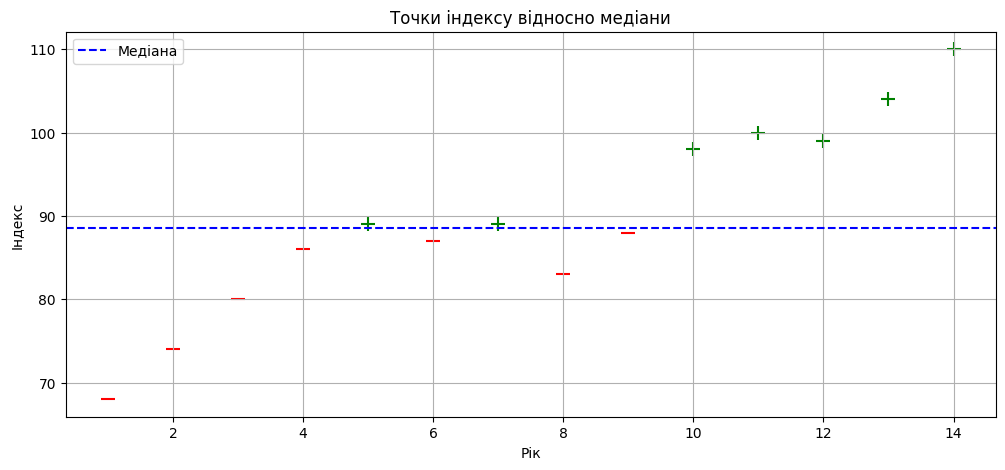

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_1samp

# Створення DataFrame
data_industrial = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'INDEX': [68, 74, 80, 86, 89, 87, 89, 83, 88, 98, 100, 99, 104, 110]
}
df_industrial = pd.DataFrame(data_industrial)


# (a) Тест на випадковість (Runs Test) 

median_industrial = df_industrial['INDEX'].median()
binary_industrial = np.where(df_industrial['INDEX'] > median_industrial, 1, 0)

# Підрахунок кількості runs
runs_industrial = 1
for i in range(1, len(binary_industrial)):
    if binary_industrial[i] != binary_industrial[i-1]:
        runs_industrial += 1

n1_industrial = sum(binary_industrial)
n2_industrial = len(binary_industrial) - n1_industrial

expected_runs_industrial = (2 * n1_industrial * n2_industrial) / (n1_industrial + n2_industrial) + 1
std_dev_industrial = np.sqrt(
    (2 * n1_industrial * n2_industrial * (2 * n1_industrial * n2_industrial - n1_industrial - n2_industrial)) / 
    ((n1_industrial + n2_industrial)**2 * (n1_industrial + n2_industrial - 1)))
z_stat_industrial = (runs_industrial - expected_runs_industrial) / std_dev_industrial

print("\nРезультати для промислового індексу:")
print(f"Медіана: {median_industrial}")
print(f"Runs: {runs_industrial}")
print(f"Очікувана кількість runs: {expected_runs_industrial:.2f}")
print(f"Z-статистика: {z_stat_industrial:.3f}")

if abs(z_stat_industrial) > 1.96:
    print("Висновок: Серія НЕ випадкова (H0 відхилено)")
else:
    print("Висновок: Серія випадкова (H0 не відхилено)")
    
# Побудова графіка з позначенням точок відносно медіани
plt.figure(figsize=(12, 5))
for i, value in enumerate(df_industrial['INDEX']):
    color = 'green' if value > median_industrial else 'red'
    marker = '+' if value > median_industrial else '_'
    plt.scatter(df_industrial['YEAR'][i], value, c=color, marker=marker, s=100)

plt.axhline(median_industrial, color='blue', linestyle='--', label='Медіана')
plt.title('Точки індексу відносно медіани')
plt.xlabel('Рік')
plt.ylabel('Індекс')
plt.legend()
plt.grid(True)
plt.show()    

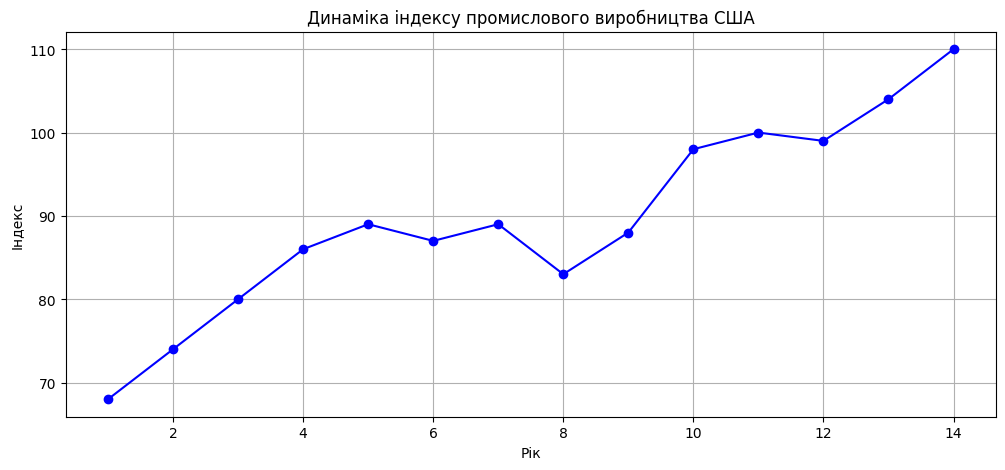

In [7]:
# (b) Побудова часового графіка

plt.figure(figsize=(12, 5))
plt.plot(df_industrial['YEAR'], df_industrial['INDEX'], marker='o', linestyle='-', color='blue')
plt.title('Динаміка індексу промислового виробництва США')
plt.xlabel('Рік')
plt.ylabel('Індекс')
plt.grid(True)
plt.show()

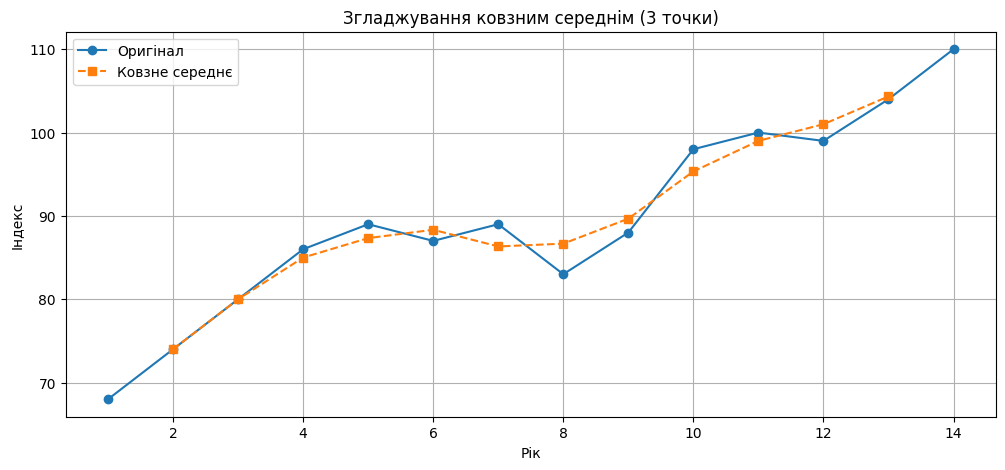

In [8]:
# (c) 3-точкове ковзне середнє

df_industrial['MA_3'] = df_industrial['INDEX'].rolling(window=3, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(df_industrial['YEAR'], df_industrial['INDEX'], label='Оригінал', marker='o')
plt.plot(df_industrial['YEAR'], df_industrial['MA_3'], label='Ковзне середнє', linestyle='--', marker='s')
plt.title('Згладжування ковзним середнім (3 точки)')
plt.xlabel('Рік')
plt.ylabel('Індекс')
plt.legend()
plt.grid(True)
plt.show()

Медіана: 737.0
Послідовність: + - - + + + + - - + - - + + + - - - + + + - - -
Кількість прогонів (R): 10
z-статистика: -1.252
p-значення: 0.210


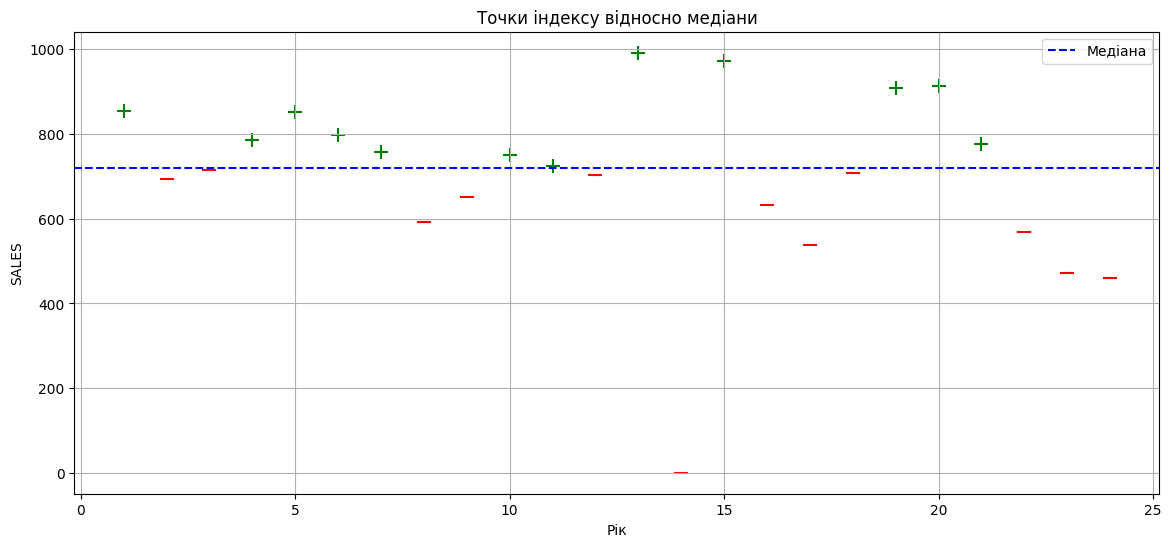

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Створення DataFrame
data = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'SALES': [853, 693, 715, 785, 851, 797, 758, 593, 650, 751, 723, 702, 991, 1129, 972, 631, 538, 708, 907, 912, 777, 569, 473, 459]
}

# Створення DataFrame
df = pd.DataFrame(data)
sales = df['SALES'].tolist()

# (a) Тест на випадковість (Runs Test) 

# # Крок 1: Обчислення медіани
median = np.median(sales) #Вирахуємо медіану

# Крок 2: Побудова послідовності '+' та '-'
signs = ['+' if x > median else '-' for x in data["SALES"]]
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1
        
# Крок 3: Підрахунок прогонів (групи однакових символів)
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1
        
n1 = signs.count('+')
n2 = signs.count('-')

# Крок 4: Обчислення z-статистики
expected_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
std_dev = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1)))
z = (runs - expected_runs) / std_dev

# Крок 5: Визначення p-значення (двосторонній тест)
p_value = 2 * (1 - norm.cdf(abs(z)))  # Подвоєння для двостороннього тесту

# Вивід результатів
print(f"Медіана: {median}")
print(f"Послідовність: {' '.join(signs)}")
print(f"Кількість прогонів (R): {runs}")
print(f"z-статистика: {z:.3f}")
print(f"p-значення: {p_value:.3f}")

    
# Побудова графіка з позначенням точок відносно медіани
plt.figure(figsize=(14, 6))
for i, value in enumerate(df_industrial['SALES']):
    color = 'green' if value > median_industrial else 'red'
    marker = '+' if value > median_industrial else '_'
    plt.scatter(df_industrial['YEAR'][i], value, c=color, marker=marker, s=100)

plt.axhline(median_industrial, color='blue', linestyle='--', label='Медіана')
plt.title('Точки індексу відносно медіани')
plt.xlabel('Рік')
plt.ylabel('SALES')
plt.legend()
plt.grid(True)
plt.show() 


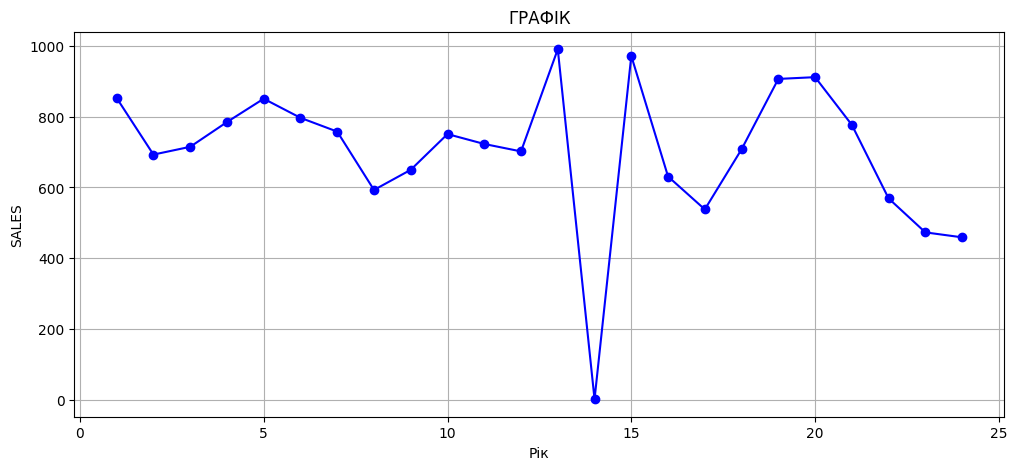

In [14]:
# (b) Побудова часового графіка

plt.figure(figsize=(12, 5))
plt.plot(df_industrial['YEAR'], df_industrial['SALES'], marker='o', linestyle='-', color='blue')
plt.title('ГРАФІК')
plt.xlabel('Рік')
plt.ylabel('SALES')
plt.grid(True)
plt.show()

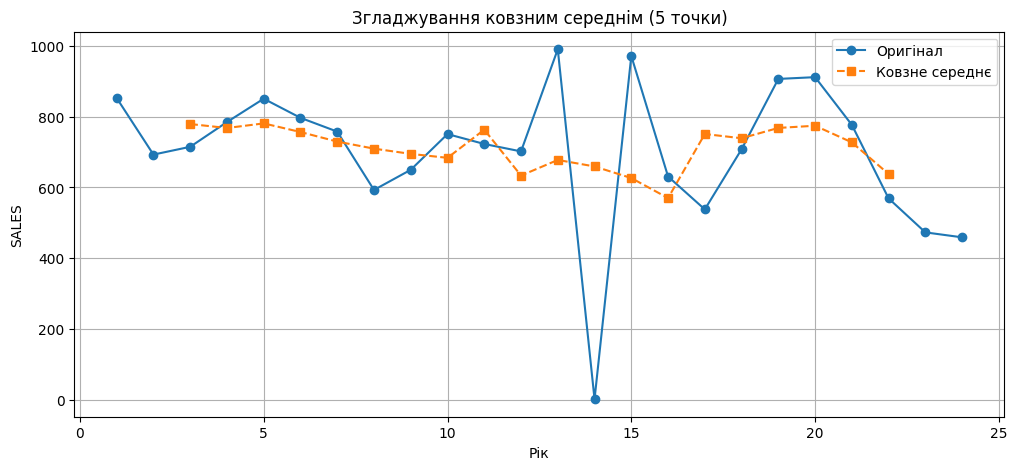

In [15]:
# (c) 5-точкове ковзне середнє

df_industrial['MA_5'] = df_industrial['SALES'].rolling(window=5, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(df_industrial['YEAR'], df_industrial['SALES'], label='Оригінал', marker='o')
plt.plot(df_industrial['YEAR'], df_industrial['MA_5'], label='Ковзне середнє', linestyle='--', marker='s')
plt.title('Згладжування ковзним середнім (5 точки)')
plt.xlabel('Рік')
plt.ylabel('SALES')
plt.legend()
plt.grid(True)
plt.show()

# 52

=== Runs Test на випадковість ===
Медіана: 737.0
Кількість пробігів: 10
Кількість '+' (вище медіани): 12
Кількість '-' (нижче або рівно медіані): 12
Очікувана кількість пробігів: 13.000
Стандартне відхилення: 2.396
Z-значення: -1.252
p-значення (двостороннє): 0.210
→ Не відхиляємо H0: Дані можуть бути випадковими.


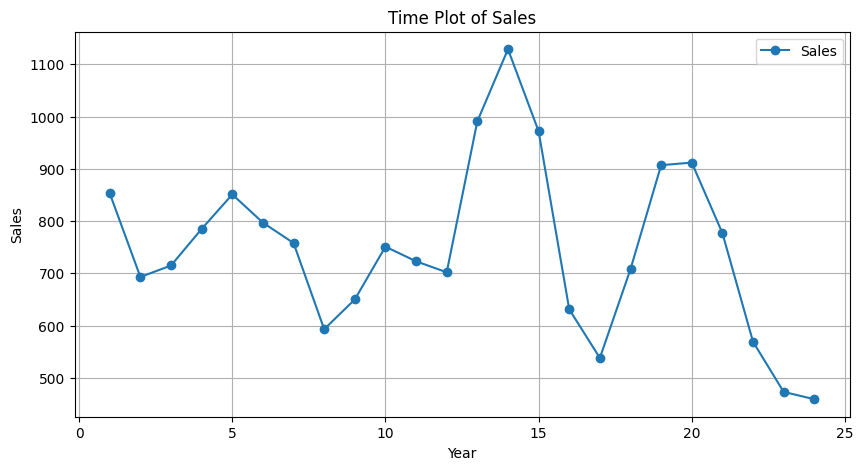

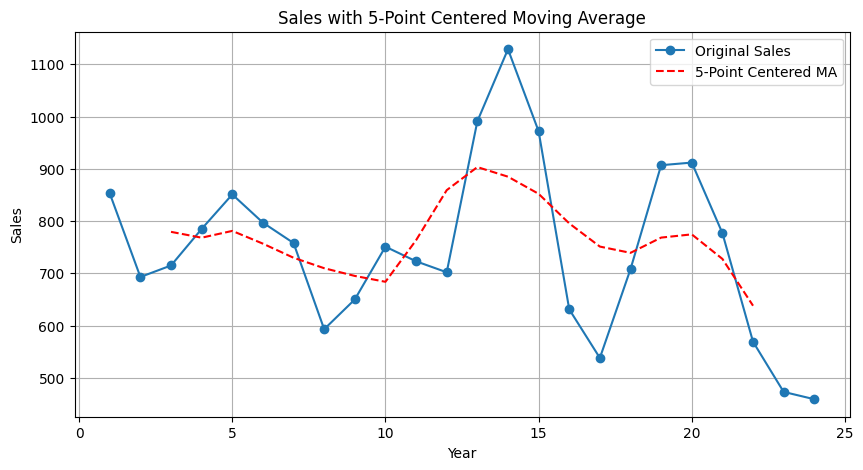

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Дані з таблиці
years = list(range(1, 25))
sales = [
    853, 693, 715, 785, 851, 797, 758, 593,
    650, 751, 723, 702, 991, 1129, 972, 631,
    538, 708, 907, 912, 777, 569, 473, 459
]

df = pd.DataFrame({"Year": years,"Sales": sales})


# (a)
median_sales = np.median(sales)

signs = ['+' if x > median_sales else '-' for x in sales]

runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i - 1]:
        runs += 1

n1 = signs.count('+')
n2 = signs.count('-')

expected_runs = (2 * n1 * n2) / (n1 + n2) + 1
std_dev_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) /
                       (((n1 + n2)**2) * (n1 + n2 - 1)))

z = (runs - expected_runs) / std_dev_runs

p_value = 2 * (1 - norm.cdf(abs(z)))

# Виводимо результати
print("=== Runs Test на випадковість ===")
print(f"Медіана: {median_sales}")
print(f"Кількість пробігів: {runs}")
print(f"Кількість '+' (вище медіани): {n1}")
print(f"Кількість '-' (нижче або рівно медіані): {n2}")
print(f"Очікувана кількість пробігів: {expected_runs:.3f}")
print(f"Стандартне відхилення: {std_dev_runs:.3f}")
print(f"Z-значення: {z:.3f}")
print(f"p-значення (двостороннє): {p_value:.3f}")

if p_value < 0.05:
    print("→ Відхиляємо H0: Дані не є випадковими.")
else:
    print("→ Не відхиляємо H0: Дані можуть бути випадковими.")


# (b) Побудова графіка часового ряду
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sales"], marker='o', linestyle='-', label="Sales")
plt.title("Time Plot of Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# (c) Обчислення 5-точкового центрованого ковзного середнього
df["5pt MA"] = df["Sales"].rolling(window=5, center=True).mean()

# Побудова графіка згладженого ряду
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sales"], label="Original Sales", marker='o')
plt.plot(df["Year"], df["5pt MA"], label="5-Point Centered MA", color='red', linestyle='--')
plt.title("Sales with 5-Point Centered Moving Average")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# 53

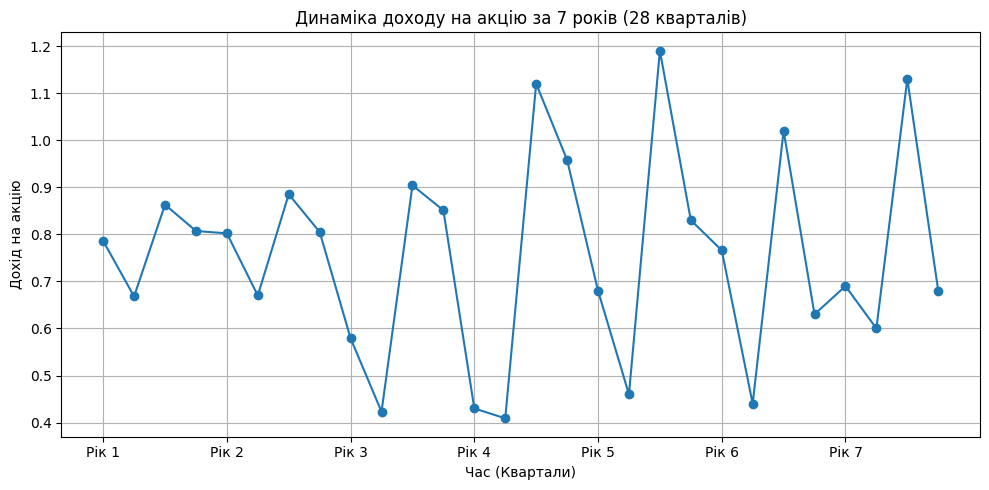

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Дані з таблиці

year = [1, 2, 3, 4, 5, 6, 7]
quarters = range(1, 29)
earnings = [0.786, 0.668, 0.863, 0.807, 0.802, 0.670, 0.885, 0.805, 0.579, 0.423, 0.904, 0.851, 0.430, 0.409, 1.120, 0.958, 0.680, 0.460, 1.190, 0.830, 0.766, 0.440, 1.020, 0.630, 0.690, 0.600, 1.130, 0.680]


# Створення DataFrame
df = pd.DataFrame({
    'Quarter': quarters,
    'Earnings': earnings
})



# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(df['Quarter'], df['Earnings'], marker='o', linestyle='-')
plt.title('Динаміка доходу на акцію за 7 років (28 кварталів)')
plt.xlabel('Час (Квартали)')
plt.ylabel('Дохід на акцію')
plt.grid(True)
plt.xticks(ticks=range(1, 29, 4), labels=[f'Рік {i}' for i in range(1, 8)])
plt.tight_layout()
plt.show()

   Quarter  Earnings  Moving_Avg  Seasonal_Index  Adjusted
0        1     0.786         NaN             NaN       NaN
1        2     0.668         NaN             NaN       NaN
2        3     0.863     0.78100         0.08200   0.78100
3        4     0.807     0.78500         0.02200   0.78500
4        5     0.802     0.78550         0.01650   0.78550
5        6     0.670     0.79100        -0.12100   0.79100
6        7     0.885     0.79050         0.09450   0.79050
7        8     0.805     0.73475         0.07025   0.73475
8        9     0.579     0.67300        -0.09400   0.67300
9       10     0.423     0.67775        -0.25475   0.67775


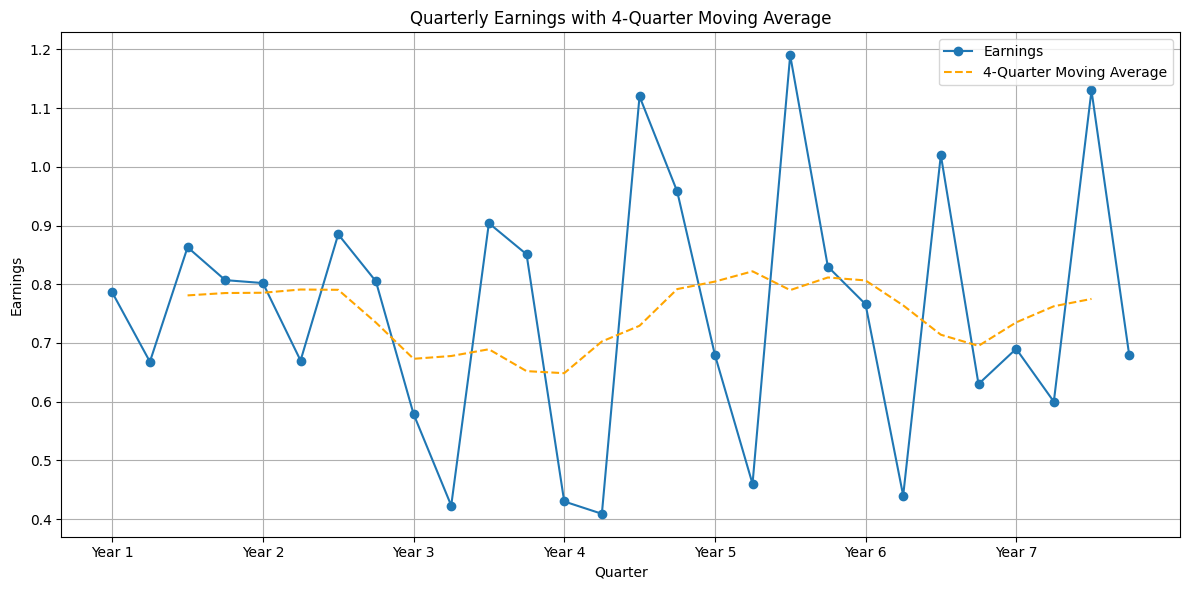

In [5]:
# Копіюємо довгий DataFrame
df_ma = df.copy()

# Рухоме середнє з вікном = 4
df_ma['Moving_Avg'] = df_ma['Earnings'].rolling(window=4, center=True).mean()

# Сезонні коливання (observed - trend)
df_ma['Seasonal_Effect'] = df_ma['Earnings'] - df_ma['Moving_Avg']

# Усереднення сезонних ефектів по кварталах
seasonal_effect = df_ma.groupby('Quarter')['Seasonal_Effect'].mean()

# Додаємо індекси сезонності
df_ma['Seasonal_Index'] = df_ma['Quarter'].map(seasonal_effect)

# Скориговані значення
df_ma['Adjusted'] = df_ma['Earnings'] - df_ma['Seasonal_Index']

# Результат
print(df_ma[['Quarter', 'Earnings', 'Moving_Avg', 'Seasonal_Index', 'Adjusted']].head(10))



# Побудова графіку
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df_ma['Earnings'], label='Earnings', marker='o')
plt.plot(df['Quarter'], df_ma['Moving_Avg'], label='4-Quarter Moving Average', linestyle='--', color='orange')
plt.title('Quarterly Earnings with 4-Quarter Moving Average')
plt.xlabel('Quarter')
plt.ylabel('Earnings')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(1, 29, 4), labels=[f'Year {i}' for i in range(1, 8)])
plt.tight_layout()
plt.show()

# 54

Дані з ковзними середніми:
    MONTH  PRICE    SMOOTHED
0       1     79         NaN
1       2     87   85.000000
2       3     89   88.666667
3       4     90   89.000000
4       5     88   89.000000
5       6     89   90.333333
6       7     94   91.666667
7       8     92   91.333333
8       9     88   92.000000
9      10     96  100.333333
10     11    117  109.666667
11     12    116  115.666667
12     13    114  114.333333
13     14    113  112.000000
14     15    109         NaN


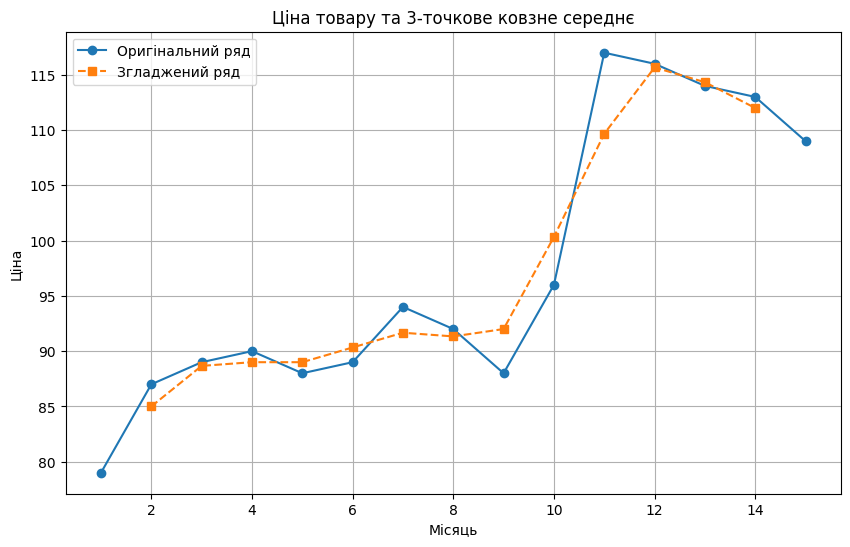

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Крок 1: Створення датафрейму з даними
data = {
    'MONTH': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'PRICE': [79, 87, 89, 90, 88, 89, 94, 92, 88, 96, 117, 116, 114, 113, 109]
}
df = pd.DataFrame(data)

# Крок 2: Обчислення 3-точкових ковзних середніх з центруванням
# Вікно 3, center=True для центрування, перший і останній елементи будуть NaN
df['SMOOTHED'] = df['PRICE'].rolling(window=3, center=True).mean()

# Вивід даних для перевірки
print("Дані з ковзними середніми:")
print(df[['MONTH', 'PRICE', 'SMOOTHED']])

# Крок 3: Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df['MONTH'], df['PRICE'], marker='o', label='Оригінальний ряд')
plt.plot(df['MONTH'], df['SMOOTHED'], marker='s', linestyle='--', label='Згладжений ряд')
plt.title('Ціна товару та 3-точкове ковзне середнє')
plt.xlabel('Місяць')
plt.ylabel('Ціна')
plt.grid(True)
plt.legend()
plt.show()

Згладжений ряд демонструє загальний тренд без дрібних коливань. Спостерігається зростання цін до 11-го місяця з подальшим плавним зниженням. Ковзне середнє ефективно видаляє "шум" даних, підкреслюючи основну тенденцію. Наприклад:

Пік на 11-му місяці (117) "згладжується" до значення ~116.

Різкі зміни (наприклад, з 96 до 117 між 10-м і 11-м місяцями) стають менш вираженими.

# 55

=== Runs Test на випадковість ===
Медіана: 737.0
Кількість пробігів: 10
Кількість '+' (вище медіани): 12
Кількість '-' (нижче або рівно медіані): 12
Очікувана кількість пробігів: 13.000
Стандартне відхилення: 2.396
Z-значення: -1.252
p-значення (двостороннє): 0.210
→ Не відхиляємо H0: Дані можуть бути випадковими.


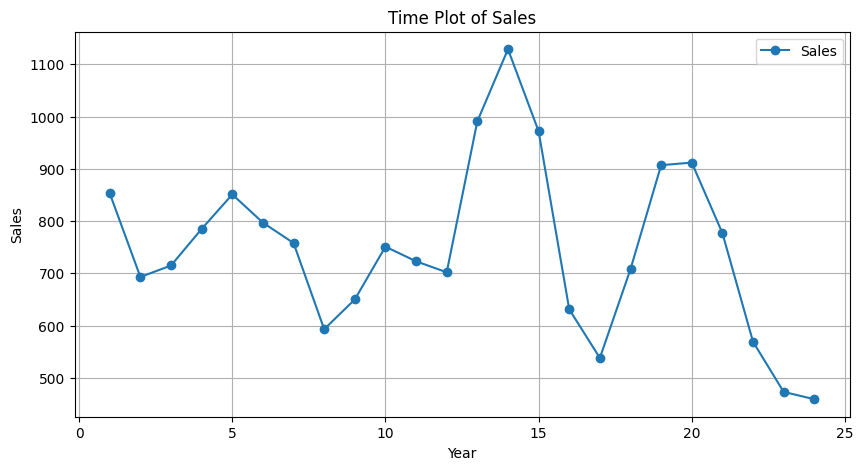

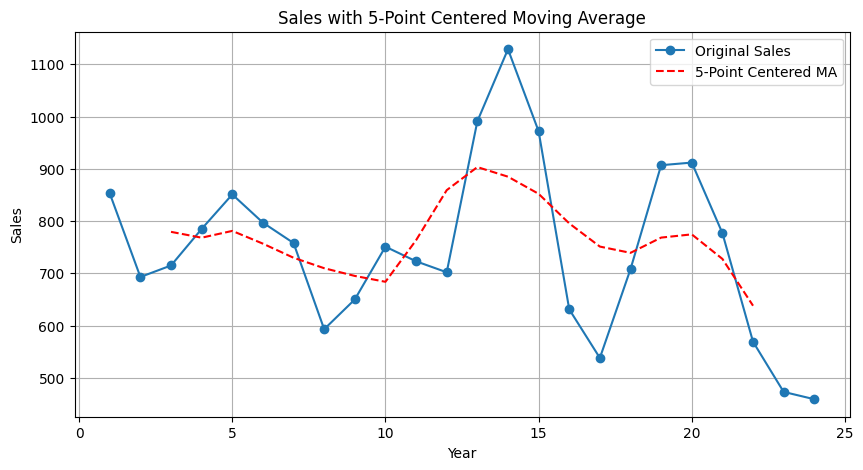

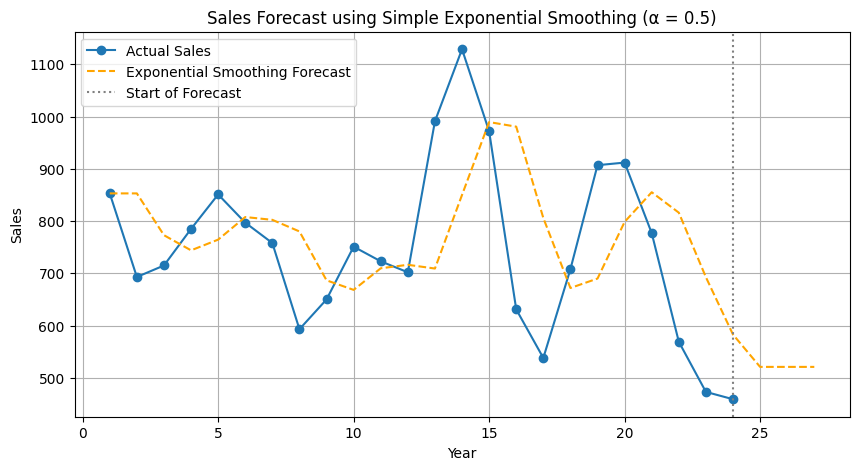

=== Прогноз на наступні 3 роки ===
Рік 25: 520.89
Рік 26: 520.89
Рік 27: 520.89


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Дані з таблиці
years = list(range(1, 25))
sales = [
    853, 693, 715, 785, 851, 797, 758, 593,
    650, 751, 723, 702, 991, 1129, 972, 631,
    538, 708, 907, 912, 777, 569, 473, 459
]

df = pd.DataFrame({"Year": years,"Sales": sales})


# (a)
median_sales = np.median(sales)

signs = ['+' if x > median_sales else '-' for x in sales]

runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i - 1]:
        runs += 1

n1 = signs.count('+')
n2 = signs.count('-')

expected_runs = (2 * n1 * n2) / (n1 + n2) + 1
std_dev_runs = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) /
                       (((n1 + n2)**2) * (n1 + n2 - 1)))

z = (runs - expected_runs) / std_dev_runs

p_value = 2 * (1 - norm.cdf(abs(z)))

# Виводимо результати
print("=== Runs Test на випадковість ===")
print(f"Медіана: {median_sales}")
print(f"Кількість пробігів: {runs}")
print(f"Кількість '+' (вище медіани): {n1}")
print(f"Кількість '-' (нижче або рівно медіані): {n2}")
print(f"Очікувана кількість пробігів: {expected_runs:.3f}")
print(f"Стандартне відхилення: {std_dev_runs:.3f}")
print(f"Z-значення: {z:.3f}")
print(f"p-значення (двостороннє): {p_value:.3f}")

if p_value < 0.05:
    print("→ Відхиляємо H0: Дані не є випадковими.")
else:
    print("→ Не відхиляємо H0: Дані можуть бути випадковими.")


# (b) Побудова графіка часового ряду
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sales"], marker='o', linestyle='-', label="Sales")
plt.title("Time Plot of Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# (c) Обчислення 5-точкового центрованого ковзного середнього
df["5pt MA"] = df["Sales"].rolling(window=5, center=True).mean()

# Побудова графіка згладженого ряду
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Sales"], label="Original Sales", marker='o')
plt.plot(df["Year"], df["5pt MA"], label="5-Point Centered MA", color='red', linestyle='--')
plt.title("Sales with 5-Point Centered Moving Average")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


# (d) Прогнозування за допомогою простого експоненціального згладжування
alpha = 0.5
forecast = [sales[0]]  # Початкове значення F1 = A1

# Розрахунок прогнозів для наявних даних
for t in range(1, len(sales)):
    ft = alpha * sales[t - 1] + (1 - alpha) * forecast[-1]
    forecast.append(ft)

# Додаємо прогнозовані значення на наступні 3 роки
for _ in range(3):
    next_forecast = alpha * sales[-1] + (1 - alpha) * forecast[-1]
    forecast.append(next_forecast)
    sales.append(next_forecast)  # Додаємо як A_t+1 умовно, бо нових реальних значень немає

# Оновлюємо роки
extended_years = list(range(1, len(forecast) + 1))

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(extended_years[:24], df["Sales"], label="Actual Sales", marker='o')
plt.plot(extended_years, forecast, label="Exponential Smoothing Forecast", linestyle='--', color='orange')
plt.axvline(x=24, linestyle=':', color='gray', label="Start of Forecast")
plt.title("Sales Forecast using Simple Exponential Smoothing (α = 0.5)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Виведення прогнозів на наступні 3 роки
print("=== Прогноз на наступні 3 роки ===")
for i in range(1, 4):
    print(f"Рік {24 + i}: {forecast[23 + i]:.2f}")


# 56

In [17]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

# Вимкнення застарілих попереджень (якщо потрібно)
warnings.filterwarnings("ignore", category=FutureWarning)

# Створення датафрейму з часовим індексом
data = {
    'PRICE': [79, 87, 89, 90, 88, 89, 94, 92, 88, 96, 117, 116, 114, 113, 109]
}
# Генеруємо місячні періоди (наприклад, починаючи з січня 2022)
dates = pd.period_range(start='2022-01', periods=15, freq='M')  # Використовуємо 'M' замість 'ME'
df = pd.DataFrame(data, index=dates)

# Ініціалізація моделі Холта-Вінтерса
model = ExponentialSmoothing(
    df['PRICE'],
    trend='add',
    seasonal=None,
    initialization_method='estimated',
    freq='M'  # Тут також 'M'
)

# Навчання моделі
model_fit = model.fit(
    smoothing_level=0.3,
    smoothing_trend=0.4,
    optimized=False
)

# Прогноз на 4 місяці
forecast = model_fit.forecast(steps=4)

# Виведення результатів
print("Історичні дані:")
print(df)
print("\nПрогноз на наступні 4 місяці:")
print(forecast)

Історичні дані:
         PRICE
2022-01     79
2022-02     87
2022-03     89
2022-04     90
2022-05     88
2022-06     89
2022-07     94
2022-08     92
2022-09     88
2022-10     96
2022-11    117
2022-12    116
2023-01    114
2023-02    113
2023-03    109

Прогноз на наступні 4 місяці:
2023-04    120.273958
2023-05    123.132326
2023-06    125.990694
2023-07    128.849061
Freq: M, dtype: float64


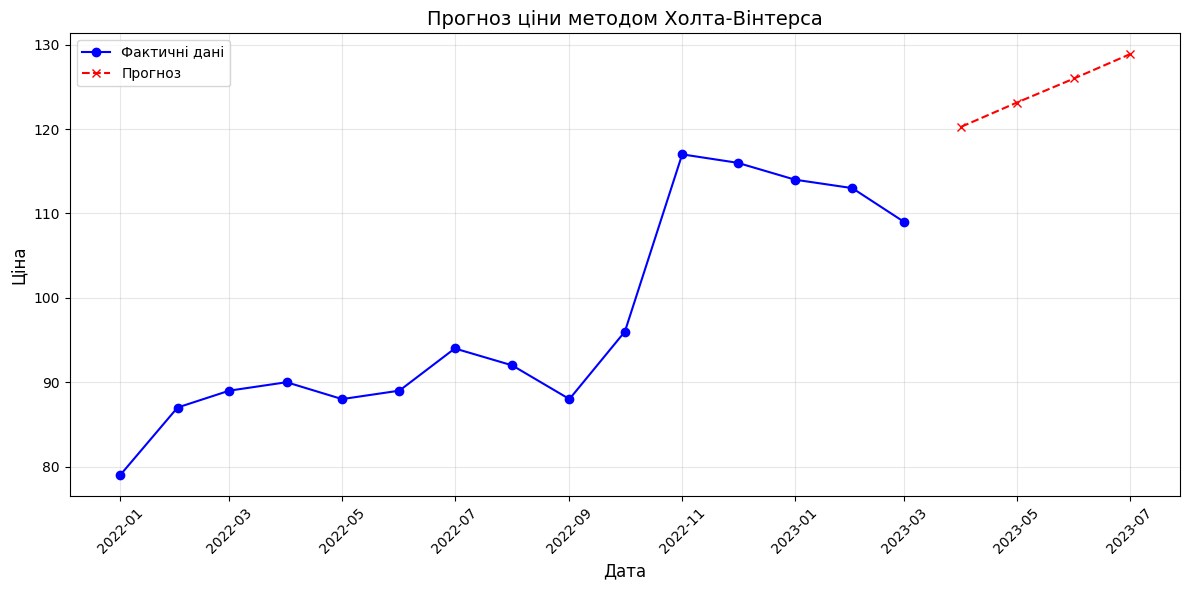

In [18]:
# Створення графіка
plt.figure(figsize=(12, 6))

# Історичні дані (конвертуємо PeriodIndex до Timestamp)
plt.plot(
    df.index.to_timestamp(), 
    df['PRICE'], 
    label='Фактичні дані', 
    marker='o',
    color='blue'
)

# Прогноз (генеруємо дати для прогнозу)
forecast_dates = pd.period_range(
    start=df.index[-1] + 1,  # Починаємо з наступного місяця після останньої дати
    periods=4, 
    freq='M'
)
plt.plot(
    forecast_dates.to_timestamp(), 
    forecast, 
    label='Прогноз', 
    marker='x', 
    linestyle='--', 
    color='red'
)

# Налаштування вигляду
plt.title('Прогноз ціни методом Холта-Вінтерса', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

# 57

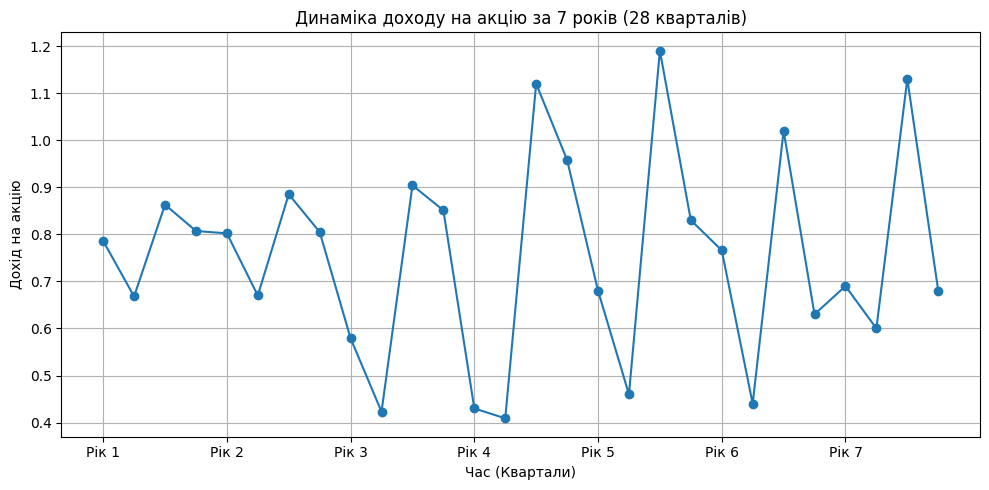

   Quarter  Earnings  Moving_Avg  Seasonal_Index  Adjusted
0        1     0.786         NaN             NaN       NaN
1        2     0.668         NaN             NaN       NaN
2        3     0.863     0.78100         0.08200   0.78100
3        4     0.807     0.78500         0.02200   0.78500
4        5     0.802     0.78550         0.01650   0.78550
5        6     0.670     0.79100        -0.12100   0.79100
6        7     0.885     0.79050         0.09450   0.79050
7        8     0.805     0.73475         0.07025   0.73475
8        9     0.579     0.67300        -0.09400   0.67300
9       10     0.423     0.67775        -0.25475   0.67775


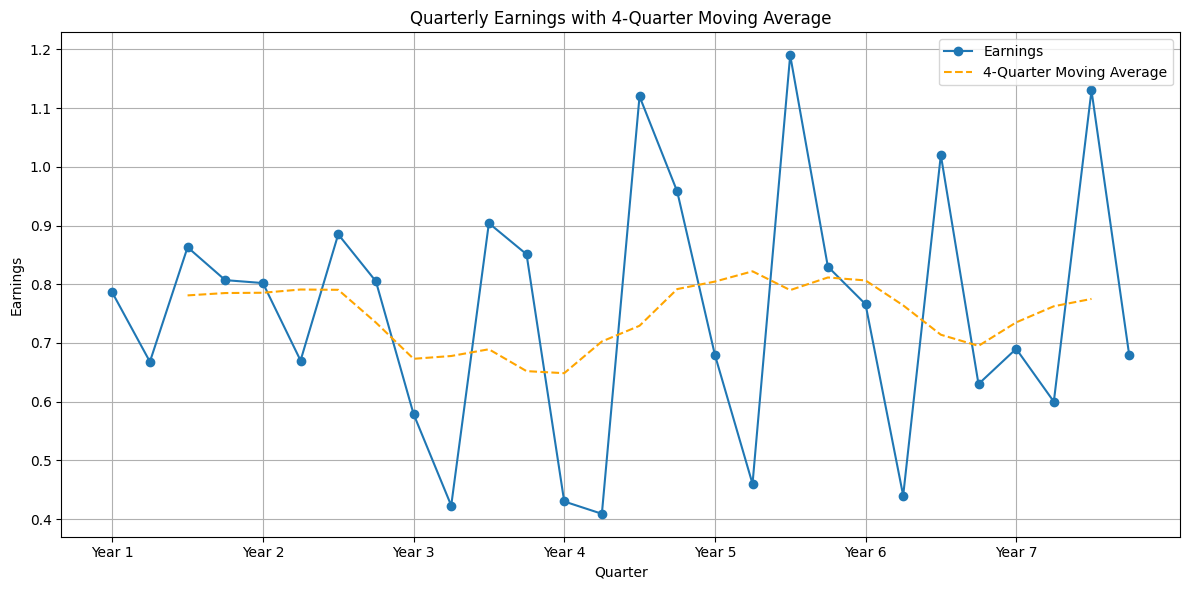

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Дані з таблиці

year = [1, 2, 3, 4, 5, 6, 7]
quarters = range(1, 29)
earnings = [0.786, 0.668, 0.863, 0.807, 0.802, 0.670, 0.885, 0.805, 0.579, 0.423, 0.904, 0.851, 0.430, 0.409, 1.120, 0.958, 0.680, 0.460, 1.190, 0.830, 0.766, 0.440, 1.020, 0.630, 0.690, 0.600, 1.130, 0.680]


# Створення DataFrame
df = pd.DataFrame({
    'Quarter': quarters,
    'Earnings': earnings
})



# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(df['Quarter'], df['Earnings'], marker='o', linestyle='-')
plt.title('Динаміка доходу на акцію за 7 років (28 кварталів)')
plt.xlabel('Час (Квартали)')
plt.ylabel('Дохід на акцію')
plt.grid(True)
plt.xticks(ticks=range(1, 29, 4), labels=[f'Рік {i}' for i in range(1, 8)])
plt.tight_layout()
plt.show()
df

# Копіюємо довгий DataFrame
df_ma = df.copy()

# Рухоме середнє з вікном = 4
df_ma['Moving_Avg'] = df_ma['Earnings'].rolling(window=4, center=True).mean()

# Сезонні коливання (observed - trend)
df_ma['Seasonal_Effect'] = df_ma['Earnings'] - df_ma['Moving_Avg']

# Усереднення сезонних ефектів по кварталах
seasonal_effect = df_ma.groupby('Quarter')['Seasonal_Effect'].mean()

# Додаємо індекси сезонності
df_ma['Seasonal_Index'] = df_ma['Quarter'].map(seasonal_effect)

# Скориговані значення
df_ma['Adjusted'] = df_ma['Earnings'] - df_ma['Seasonal_Index']

# Результат
print(df_ma[['Quarter', 'Earnings', 'Moving_Avg', 'Seasonal_Index', 'Adjusted']].head(10))



# Побудова графіку
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df_ma['Earnings'], label='Earnings', marker='o')
plt.plot(df['Quarter'], df_ma['Moving_Avg'], label='4-Quarter Moving Average', linestyle='--', color='orange')
plt.title('Quarterly Earnings with 4-Quarter Moving Average')
plt.xlabel('Quarter')
plt.ylabel('Earnings')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(1, 29, 4), labels=[f'Year {i}' for i in range(1, 8)])
plt.tight_layout()
plt.show()



=== Прогноз на наступні 4 квартали ===
Квартал 29: 0.676
Квартал 30: 0.516
Квартал 31: 1.039
Квартал 32: 0.780


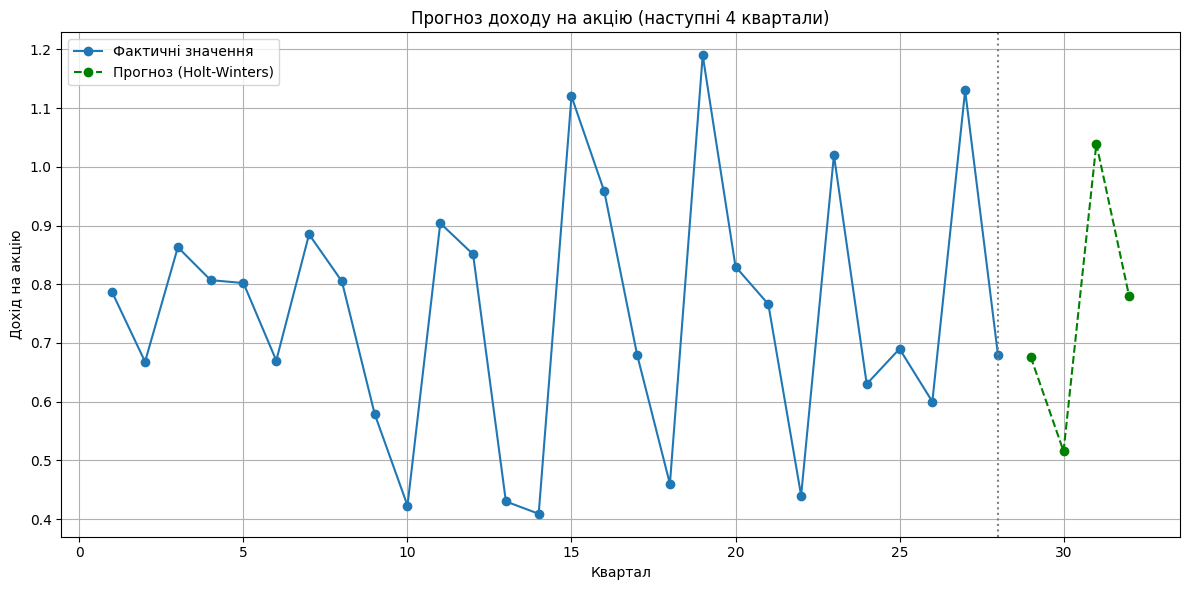

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Створюємо модель Holt-Winters із сезонністю на 4 квартали
model = ExponentialSmoothing(
    df['Earnings'],
    trend='add',
    seasonal='add',
    seasonal_periods=4,
    initialization_method='estimated'
)

# Навчаємо модель
fit = model.fit(smoothing_level=0.4, smoothing_trend=0.4, smoothing_seasonal=0.2)

# Прогнозуємо на наступні 4 квартали
forecast = fit.forecast(steps=4)

# Виводимо прогнозовані значення
print("=== Прогноз на наступні 4 квартали ===")
for i, val in enumerate(forecast, start=29):
    print(f"Квартал {i}: {val:.3f}")

# Побудова графіка фактичних і прогнозованих значень
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Earnings'], label='Фактичні значення', marker='o')
plt.plot(range(29, 33), forecast, label='Прогноз (Holt-Winters)', marker='o', linestyle='--', color='green')
plt.axvline(x=28, color='gray', linestyle=':')
plt.title('Прогноз доходу на акцію (наступні 4 квартали)')
plt.xlabel('Квартал')
plt.ylabel('Дохід на акцію')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 58

AR(1): Останній лаг значущий (p-value=0.0004)
AR(2): Останній лаг значущий (p-value=0.0000)
AR(3): Останній лаг НЕ значущий (p-value=0.2960). Зупинка на порядку 2

Обрана модель: AR(2)

Прогнози на наступні 3 роки:
24    672.84
25    905.53
26    978.97
dtype: float64


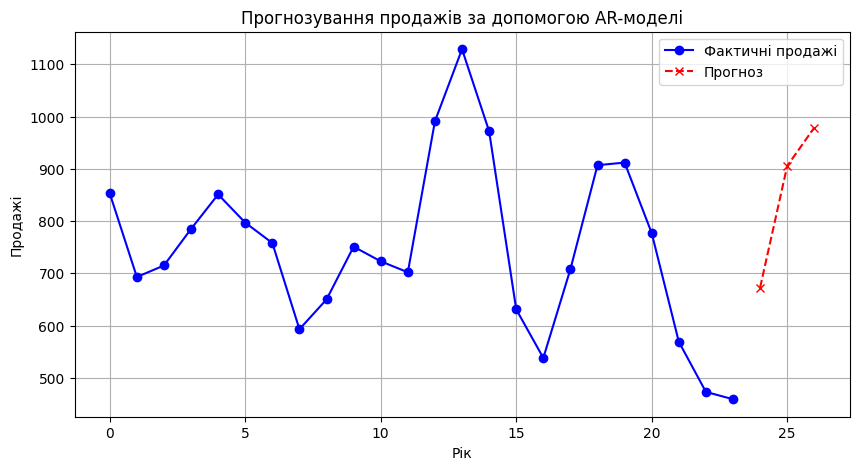

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Дані з таблиці (впорядковані за роками 1-24)
sales = [
    853, 693, 715, 785, 851, 797, 758, 593,
    650, 751, 723, 702, 991, 1129, 972, 631,
    538, 708, 907, 912, 777, 569, 473, 459
]

# Створення часового ряду
df = pd.DataFrame({'Sales': sales})

# Функція для тестування значущості лагів
def select_ar_order(data, max_order=4, alpha=0.1):
    for p in range(1, max_order+1):
        model = AutoReg(data, lags=p, old_names=False)
        results = model.fit()
        p_values = results.pvalues
        # Перевірка значущості останнього лагу
        if p_values[-1] < alpha:
            print(f'AR({p}): Останній лаг значущий (p-value={p_values[-1]:.4f})')
            selected_order = p
        else:
            print(f'AR({p}): Останній лаг НЕ значущий (p-value={p_values[-1]:.4f}). Зупинка на порядку {p-1}')
            selected_order = p-1
            break
    return selected_order

# Вибір порядку моделі
best_order = select_ar_order(df['Sales'], max_order=4, alpha=0.1)
print(f'\nОбрана модель: AR({best_order})')

# Навчання обраної моделі
model = AutoReg(df['Sales'], lags=best_order, old_names=False)
results = model.fit()

# Прогноз на 3 періоди
forecast = results.forecast(steps=3)
print('\nПрогнози на наступні 3 роки:')
print(forecast.apply(lambda x: round(x, 2)))

# Візуалізація
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], 'bo-', label='Фактичні продажі')
forecast_index = np.arange(len(df), len(df)+3)
plt.plot(forecast_index, forecast, 'rx--', label='Прогноз')
plt.title('Прогнозування продажів за допомогою AR-моделі')
plt.xlabel('Рік')
plt.ylabel('Продажі')
plt.legend()
plt.grid(True)
plt.show()